In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

### Loading the Raw Data

In [2]:
raw_data=pd.read_csv('carsales.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


### Preprocessing 

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


#### Determining the variables of Interest

In [4]:
data= raw_data.drop(['Model'],axis=1)
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


In [5]:
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


##### Price and Engine V doesnt contain all the values in the above table

#### Dealing with missing values

In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [7]:
data_no_mv=data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the Probability Distribution Functions(PDFs)

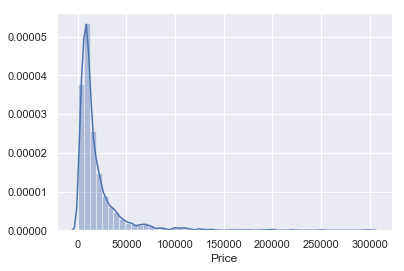

In [8]:
sns.distplot(data_no_mv['Price'])

#### Dealing with outliers

In [9]:
q=data_no_mv['Price'].quantile(0.99)
data1=data_no_mv[data_no_mv['Price']<q]
data1.describe()

,Price,Mileage,EngineV,Year
count,3984.000000,3984.000000,3984.000000,3984.000000
mean,17837.117460,165.116466,2.743770,2006.292922
std,18976.268315,102.766126,4.956057,6.672745
min,600.000000,0.000000,0.600000,1969.000000
25%,6980.000000,93.000000,1.800000,2002.750000
50%,11400.000000,160.000000,2.200000,2007.000000
75%,21000.000000,230.000000,3.000000,2011.000000
max,129222.000000,980.000000,99.990000,2016.000000


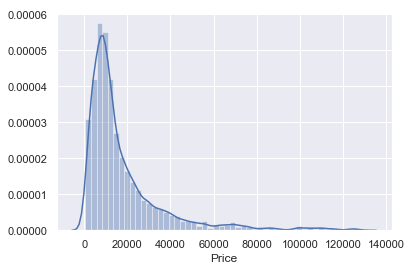

In [10]:
sns.distplot(data1['Price'])

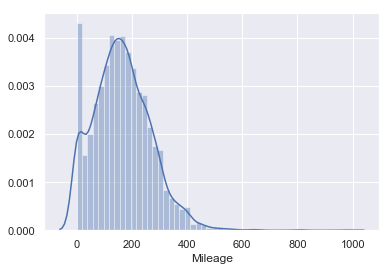

In [11]:
sns.distplot(data1['Mileage'])

In [12]:
q=data1['Mileage'].quantile(0.99)
data2=data1[data1['Mileage']<q]
data2.describe()

,Price,Mileage,EngineV,Year
count,3944.000000,3944.000000,3944.000000,3944.000000
mean,17933.880822,161.484026,2.747612,2006.389959
std,19008.212025,96.027108,4.980406,6.595986
min,600.000000,0.000000,0.600000,1969.000000
25%,7000.000000,92.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21376.250000,230.000000,3.000000,2011.000000
max,129222.000000,435.000000,99.990000,2016.000000


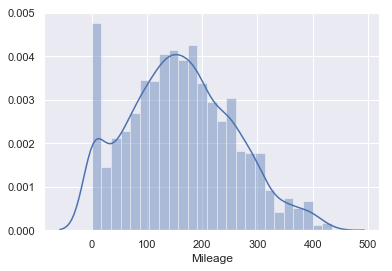

In [13]:
sns.distplot(data2['Mileage'])

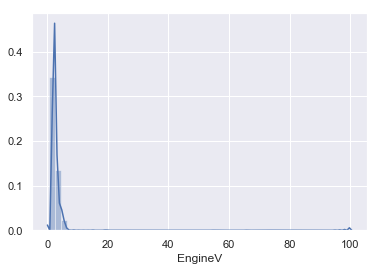

In [14]:
sns.distplot(data2['EngineV'])

In [15]:
data3=data2[data2['EngineV']<6.5]


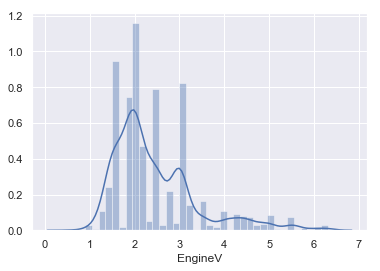

In [16]:
sns.distplot(data3['EngineV'])

###### we use the condition (<6.5) because its the max Engine volume, values greater than 6.5 are errors or values labelled for missing values

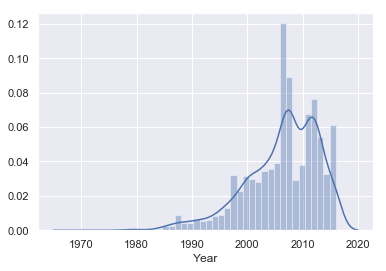

In [17]:
sns.distplot(data3['Year'])

In [18]:
q=data3['Year'].quantile(0.01)
data4=data3[data3['Year']>q]

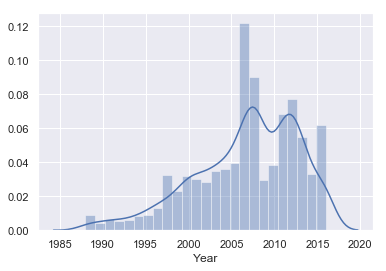

In [19]:
sns.distplot(data4['Year'])

In [20]:
data_cleaned=data4.reset_index(drop=True)

In [21]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### Checking the OLS assumptions

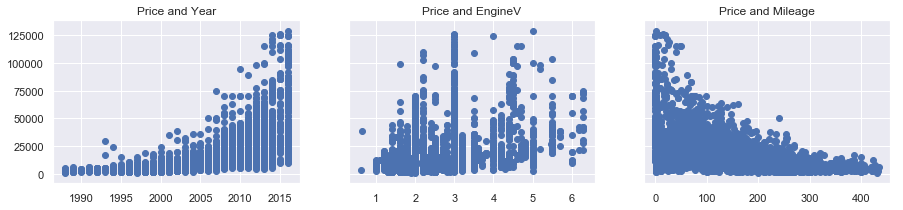

In [22]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

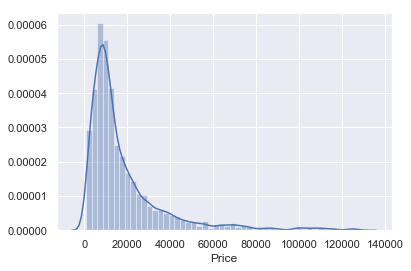

In [23]:
sns.distplot(data_cleaned['Price'])

#### Relaxing the assumptions

In [24]:
log_price=np.log(data_cleaned['Price'])
data_cleaned['Log Price']=log_price
data_cleaned.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


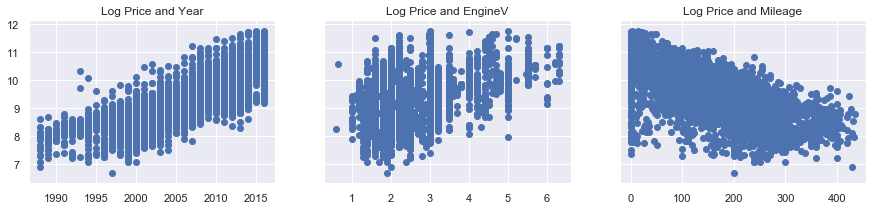

In [25]:
fig,(ax1,ax2,ax3)=plt.subplots(1,3,sharey=True,figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Log Price'])
ax1.set_title('Log Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Log Price'])
ax2.set_title('Log Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Log Price'])
ax3.set_title('Log Price and Mileage')
plt.show()

##### Since we get a linear pattern which was required, now we'll drop the Price columns because now it is no longer needed 

In [26]:
data_cleaned=data_cleaned.drop(['Price'],axis=1)

#####  Normality is assumed for big sample by CLT, zero mean of error distribution is accomplished by inclusion of the intercept in the regression and Homoscedasticity generally holds as we can see in the abovce graphs (linear patterns) as we used log transformation
##### Autocorrelation is mostly observed in obsertvations coming from time-series data and here we just have a snapshot of data related to car-sales, so there is no autocorrelation here

#### Multicollinearity

In [27]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Log Price'], dtype=object)

In [28]:
data_cleaned.head(10)

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Price
0,BMW,sedan,277,2.00,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.90,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.00,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.20,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.00,Petrol,yes,2011,9.814656
5,Audi,vagon,200,2.70,Diesel,yes,2006,9.560997
6,Renault,vagon,193,1.50,Diesel,yes,2012,9.287209
7,Volkswagen,other,212,1.80,Gas,no,1999,7.244228
8,Renault,vagon,177,1.50,Diesel,yes,2011,9.388487
9,Renault,sedan,260,1.79,Petrol,yes,1994,7.824046


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=data_cleaned[['Mileage','Year','EngineV']]
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features']=variables.columns

In [30]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


##### Since 'Year' has unacceptable multicollinearity, we shall remove it

In [31]:
data_no_multicollinearity= data_cleaned.drop(['Year'],axis=1)

### Creating Dummy Variables

In [32]:
data_with_dummies=pd.get_dummies(data_no_multicollinearity,drop_first=True)

In [33]:
data_with_dummies.head(10)

,Mileage,EngineV,Log Price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.90,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.00,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.20,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.00,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
5,200,2.70,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
6,193,1.50,9.287209,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
7,212,1.80,7.244228,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
8,177,1.50,9.388487,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
9,260,1.79,7.824046,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1


In [34]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Log Price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [35]:
cols=['Log Price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [36]:
data_preprocessed=data_with_dummies[cols]
data_preprocessed.head(10)

,Log Price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.00,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.90,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.00,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
5,9.560997,200,2.70,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
6,9.287209,193,1.50,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
7,7.244228,212,1.80,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
8,9.388487,177,1.50,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
9,7.824046,260,1.79,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1


## Linear Regression Model

#### Declare the inputs and the targets

In [37]:
targets=data_preprocessed['Log Price']
inputs=data_preprocessed.drop(['Log Price'],axis=1)

#### Scale the Data

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(inputs)

d:\anaconda\envs\black_flag\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
inputs_scaled=scaler.transform(inputs)

d:\anaconda\envs\black_flag\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


#### Train-Test Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
xtrain,xtest,ytrain,ytest= train_test_split(inputs_scaled,targets,test_size=0.2,random_state=365)

#### Creating the Regression

In [42]:
reg=LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
yhat=reg.predict(xtrain)

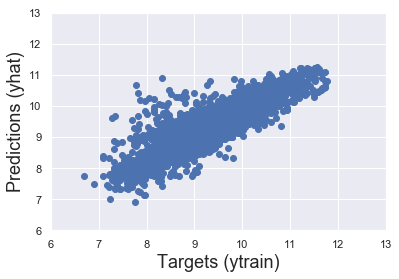

In [44]:
plt.scatter(ytrain,yhat)
plt.xlabel('Targets (ytrain)',size=18)
plt.ylabel('Predictions (yhat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

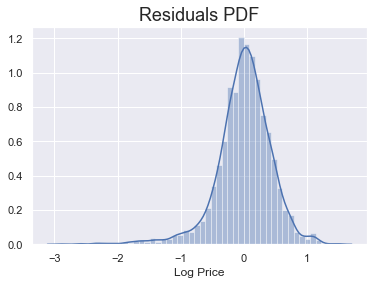

In [46]:
sns.distplot(ytrain - yhat)
plt.title("Residuals PDF",size=18)

In [47]:
reg.score(xtrain,ytrain)

0.744996578792662

#### Finding the Weights and Bias

In [48]:
reg.intercept_

9.415239458021299

In [49]:
reg.coef_

array([-0.44871341,  0.20903483,  0.0142496 ,  0.01288174, -0.14055166,
       -0.17990912, -0.06054988, -0.08992433, -0.1454692 , -0.10144383,
       -0.20062984, -0.12988747, -0.16859669, -0.12149035, -0.03336798,
       -0.14690868,  0.32047333])

In [51]:
reg_summary=pd.DataFrame(inputs.columns.values,columns=["Features"])
reg_summary['Weights']=reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448713
1,EngineV,0.209035
2,Brand_BMW,0.014250
3,Brand_Mercedes-Benz,0.012882
4,Brand_Mitsubishi,-0.140552
5,Brand_Renault,-0.179909
6,Brand_Toyota,-0.060550
7,Brand_Volkswagen,-0.089924
8,Body_hatch,-0.145469
9,Body_other,-0.101444


In [52]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

### Testing

In [54]:
yhat_test=reg.predict(xtest)

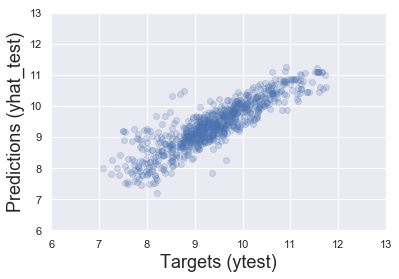

In [56]:
plt.scatter(ytest,yhat_test,alpha=0.2)
plt.xlabel('Targets (ytest)',size=18)
plt.ylabel('Predictions (yhat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [60]:
df_pf=pd.DataFrame(np.exp(yhat_test),columns=['Predictions'])

In [61]:
df_pf.head(10)

,Predictions
0,10685.501696
1,3499.255242
2,7553.285218
3,7463.963017
4,11353.490075
5,21289.799394
6,20159.189144
7,20349.617702
8,11581.537864
9,33614.617349


In [62]:
df_pf['Target']=np.exp(ytest)

In [63]:
df_pf.head(10)

,Predictions,Target
0,10685.501696,NaN
1,3499.255242,7900.0
2,7553.285218,NaN
3,7463.963017,NaN
4,11353.490075,NaN
5,21289.799394,14200.0
6,20159.189144,NaN
7,20349.617702,NaN
8,11581.537864,11950.0
9,33614.617349,NaN


In [66]:
ytest=ytest.reset_index(drop=True)
ytest

0       7.740664
1       7.937375
2       7.824046
3       8.764053
4       9.121509
5       9.903488
6      10.568441
7       9.740910
8       9.433484
9      10.621327
10      9.457200
11      8.517193
12      8.974618
13      9.740910
14      9.126959
15      9.392579
16      9.928180
17      9.179881
18     10.594132
19      9.705037
20      9.629051
21     10.106428
22      8.639411
23      9.464983
24      9.947504
25     10.373179
26      8.188689
27      9.358760
28     10.691922
29     10.657259
         ...    
744     8.006368
745     8.389360
746     8.922658
747     9.296518
748    11.258033
749     8.915969
750     8.006368
751     9.457200
752     9.392662
753     8.486734
754     9.836279
755     9.758462
756     7.863267
757     9.259131
758     8.980927
759     8.809863
760     9.104980
761     8.987197
762     9.472628
763     9.287301
764     9.277999
765     9.190138
766     9.792556
767     9.841612
768    11.232616
769    10.292146
770     9.169518
771     9.8146

In [67]:
df_pf['Target']=np.exp(ytest)
df_pf.head(10)

,Predictions,Target
0,10685.501696,2300.0
1,3499.255242,2800.0
2,7553.285218,2500.0
3,7463.963017,6400.0
4,11353.490075,9150.0
5,21289.799394,20000.0
6,20159.189144,38888.0
7,20349.617702,16999.0
8,11581.537864,12500.0
9,33614.617349,41000.0


In [69]:
df_pf['Residuals']=df_pf['Target']-df_pf['Predictions']

In [70]:
df_pf['Differences']=np.absolute(df_pf['Residuals']/df_pf['Target']*100)

In [71]:
df_pf

,Predictions,Target,Residuals,Differences
0,10685.501696,2300.0,-8385.501696,364.587030
1,3499.255242,2800.0,-699.255242,24.973402
2,7553.285218,2500.0,-5053.285218,202.131409
3,7463.963017,6400.0,-1063.963017,16.624422
4,11353.490075,9150.0,-2203.490075,24.081859
5,21289.799394,20000.0,-1289.799394,6.448997
6,20159.189144,38888.0,18728.810856,48.160900
7,20349.617702,16999.0,-3350.617702,19.710675
8,11581.537864,12500.0,918.462136,7.347697
9,33614.617349,41000.0,7385.382651,18.013128


In [72]:
df_pf.describe()

,Predictions,Target,Residuals,Differences
count,774.000000,774.000000,774.000000,774.000000
mean,15946.760167,18165.817106,2219.056939,36.256693
std,13133.197604,19967.858908,10871.218143,55.066507
min,1320.562768,1200.000000,-29456.498331,0.062794
25%,7413.644234,6900.000000,-2044.191251,12.108022
50%,11568.168859,11600.000000,142.518577,23.467728
75%,20162.408805,20500.000000,3147.343497,39.563570
max,77403.055224,126000.000000,85106.162329,512.688080


In [74]:
pd.options.display.max_rows=999
pd.set_option('display.float_format',lambda x:'%.2f'%x)
df_pf.sort_values(by=['Differences'])

,Predictions,Target,Residuals,Differences
698,30480.85,30500.00,19.15,0.06
742,16960.31,16999.00,38.69,0.23
60,12469.21,12500.00,30.79,0.25
110,25614.14,25500.00,-114.14,0.45
367,42703.68,42500.00,-203.68,0.48
369,3084.69,3100.00,15.31,0.49
769,29651.73,29500.00,-151.73,0.51
272,9749.53,9800.00,50.47,0.52
714,23118.07,22999.00,-119.07,0.52
630,8734.58,8800.00,65.42,0.74
